In [2]:
TEST_DATA_PATH = '../data/origin/test/'
TRAIN_DATA_PATH = '../data/origin/train/'

test_csv = f'{TEST_DATA_PATH}test.csv'

train_csv = f'{TRAIN_DATA_PATH}train.csv'

In [3]:
import pandas as pd

train = pd.read_csv('../data/origin/train/train.csv', index_col=0)
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2018352 entries, 0 to 15
Data columns (total 8 columns):
 #   Column              Dtype  
---  ------              -----  
 0   is_business         int64  
 1   product_type        int64  
 2   target              float64
 3   is_consumption      int64  
 4   datetime            object 
 5   data_block_id       int64  
 6   row_id              int64  
 7   prediction_unit_id  int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 138.6+ MB


In [4]:
test = pd.read_csv(test_csv)

In [5]:
test

,county,is_business,product_type,is_consumption,prediction_datetime,data_block_id,row_id,prediction_unit_id,currently_scored
0,0,0,1,0,2023-05-28 00:00:00,634,2005872,0,False
1,0,0,1,1,2023-05-28 00:00:00,634,2005873,0,False
2,0,0,2,0,2023-05-28 00:00:00,634,2005874,1,False
3,0,0,2,1,2023-05-28 00:00:00,634,2005875,1,False
4,0,0,3,0,2023-05-28 00:00:00,634,2005876,2,False
...,...,...,...,...,...,...,...,...,...
12475,15,1,0,1,2023-05-31 23:00:00,637,2018347,64,False
12476,15,1,1,0,2023-05-31 23:00:00,637,2018348,59,False
12477,15,1,1,1,2023-05-31 23:00:00,637,2018349,59,False
12478,15,1,3,0,2023-05-31 23:00:00,637,2018350,60,False


In [6]:
import seaborn as sns

In [7]:
vc = train[train.is_consumption == 1]['target'].value_counts()
vc

target
0.000       86
0.100       44
5.228       21
6.162       20
7.367       20
            ..
927.185      1
804.238      1
91.344       1
6039.947     1
197.233      1
Name: count, Length: 491121, dtype: int64

<Axes: xlabel='target', ylabel='count'>

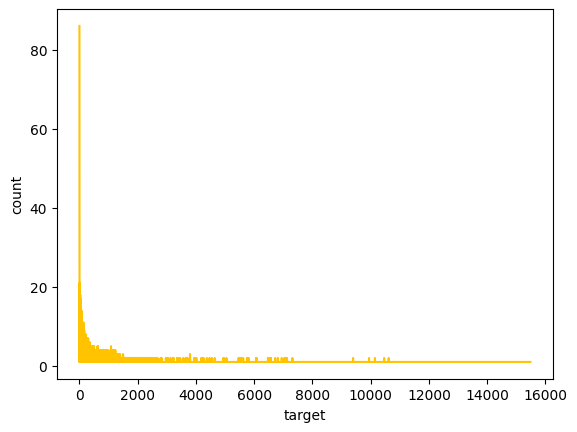

In [8]:
sns.lineplot(vc, color='#ffc300')

In [9]:
# sns.lineplot(train.datetime, color='#ffc300')

In [10]:
# sns.barplot(train.datetime.value_counts(), color='#ffc300')

<Axes: xlabel='is_consumption', ylabel='count'>

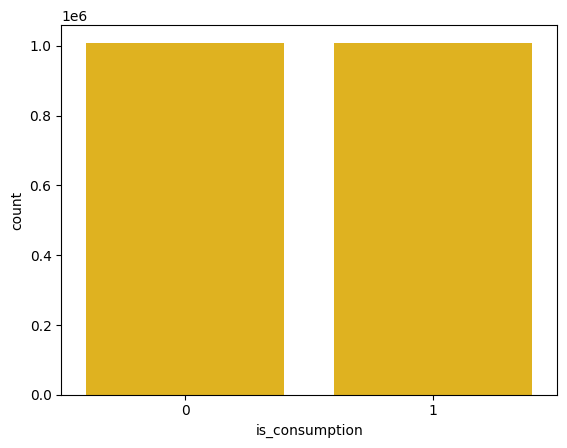

In [11]:
sns.barplot(train.is_consumption.value_counts(), color='#ffc300')

In [12]:
df = pd.read_csv('../data/origin/train/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018352 entries, 0 to 2018351
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   county              int64  
 1   is_business         int64  
 2   product_type        int64  
 3   target              float64
 4   is_consumption      int64  
 5   datetime            object 
 6   data_block_id       int64  
 7   row_id              int64  
 8   prediction_unit_id  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 138.6+ MB


In [13]:
df[df.target.isna()].datetime.unique()

array(['2021-10-31 03:00:00', '2022-03-27 03:00:00',
       '2022-10-30 03:00:00', '2023-03-26 03:00:00'], dtype=object)

In [14]:
df[df.target.isna()].is_consumption.unique()

array([0, 1])

In [15]:
df[df.target.isna()].product_type.unique()

array([1, 2, 3, 0])

In [16]:
df2 = df[df.datetime.str.contains('2021-10-31')].copy()
df2

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
178560,0,0,1,0.001,0,2021-10-31 00:00:00,60,178560,0
178561,0,0,1,188.054,1,2021-10-31 00:00:00,60,178561,0
178562,0,0,2,0.000,0,2021-10-31 00:00:00,60,178562,1
178563,0,0,2,23.976,1,2021-10-31 00:00:00,60,178563,1
178564,0,0,3,0.216,0,2021-10-31 00:00:00,60,178564,2
...,...,...,...,...,...,...,...,...,...
181579,15,0,3,78.928,1,2021-10-31 23:00:00,60,181579,58
181580,15,1,1,0.000,0,2021-10-31 23:00:00,60,181580,59
181581,15,1,1,32.772,1,2021-10-31 23:00:00,60,181581,59
181582,15,1,3,0.000,0,2021-10-31 23:00:00,60,181582,60


In [17]:
df2['time'] = df2.datetime.str.split().str[1].str.split(':').str[0]
df2

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id,time
178560,0,0,1,0.001,0,2021-10-31 00:00:00,60,178560,0,00
178561,0,0,1,188.054,1,2021-10-31 00:00:00,60,178561,0,00
178562,0,0,2,0.000,0,2021-10-31 00:00:00,60,178562,1,00
178563,0,0,2,23.976,1,2021-10-31 00:00:00,60,178563,1,00
178564,0,0,3,0.216,0,2021-10-31 00:00:00,60,178564,2,00
...,...,...,...,...,...,...,...,...,...,...
181579,15,0,3,78.928,1,2021-10-31 23:00:00,60,181579,58,23
181580,15,1,1,0.000,0,2021-10-31 23:00:00,60,181580,59,23
181581,15,1,1,32.772,1,2021-10-31 23:00:00,60,181581,59,23
181582,15,1,3,0.000,0,2021-10-31 23:00:00,60,181582,60,23


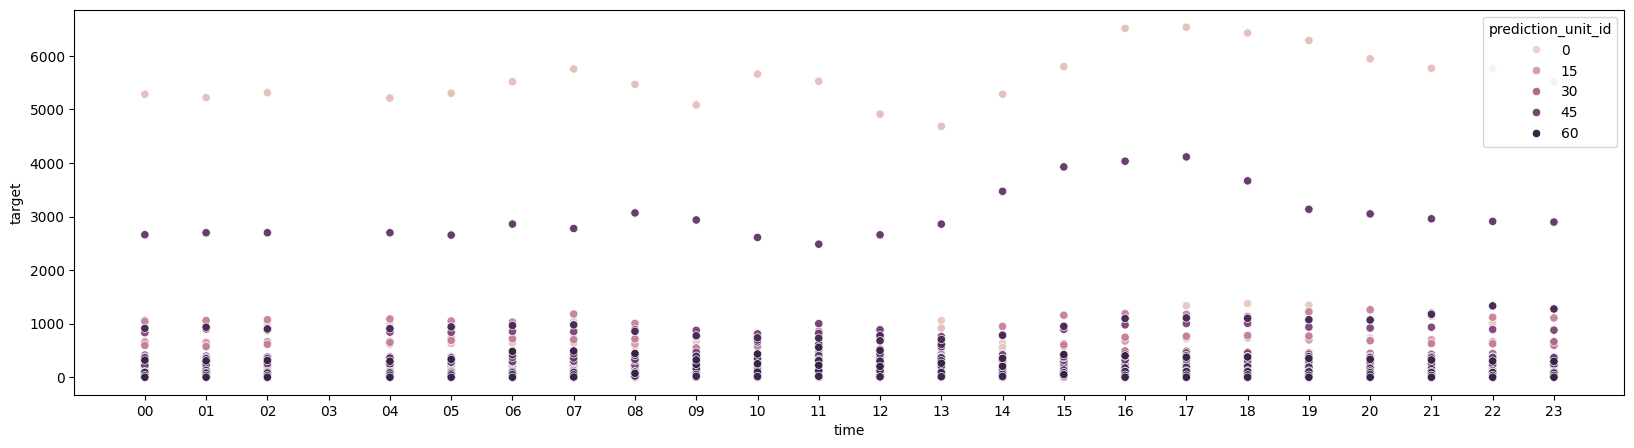

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 5))
sns.scatterplot(df2, x='time', y='target', hue='prediction_unit_id')
plt.show()

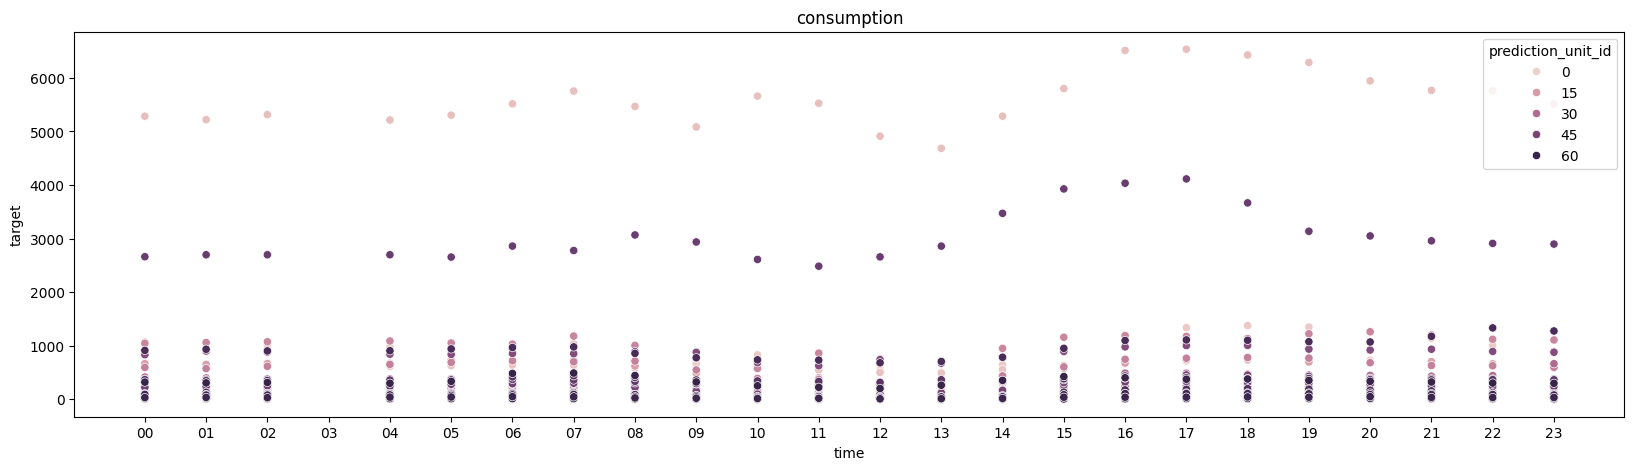

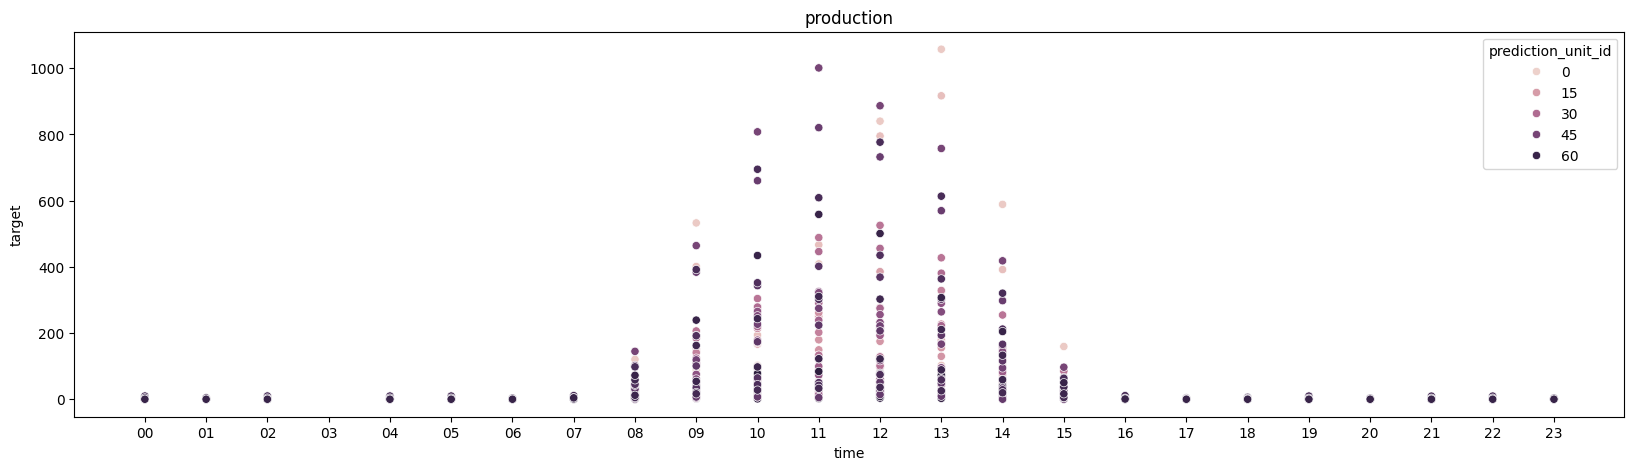

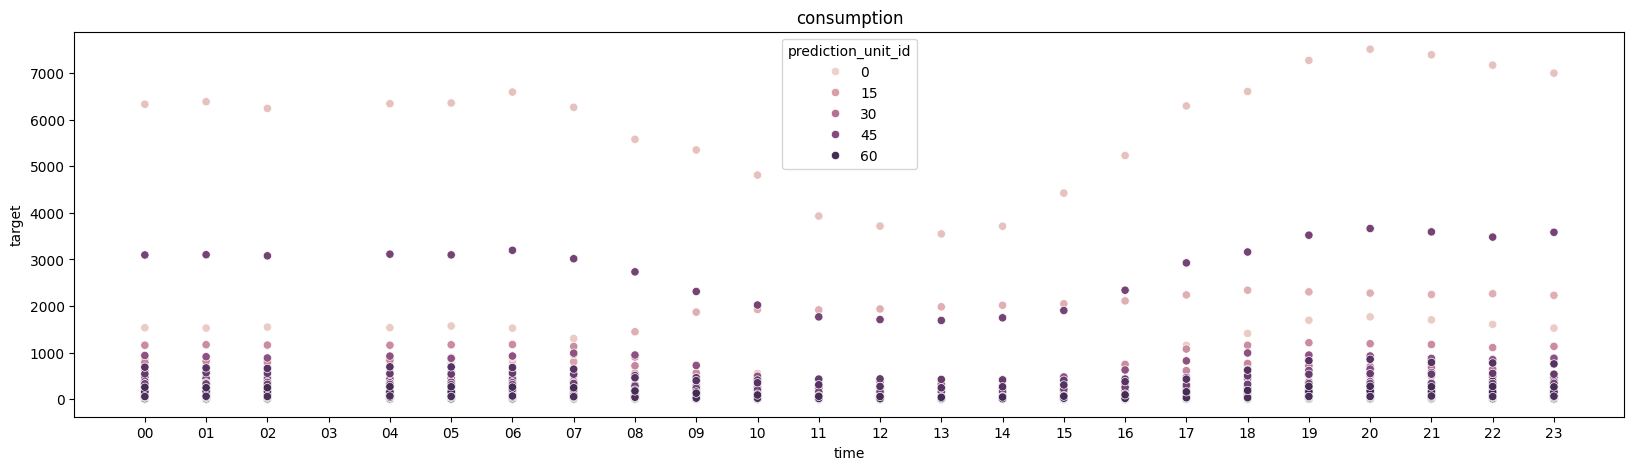

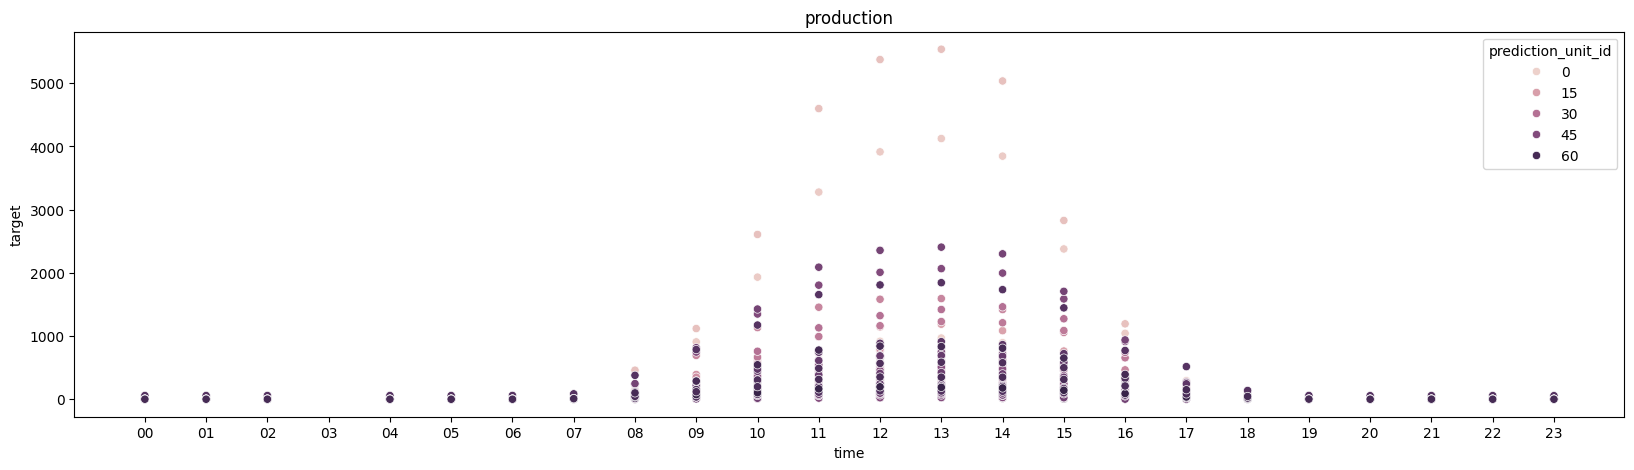

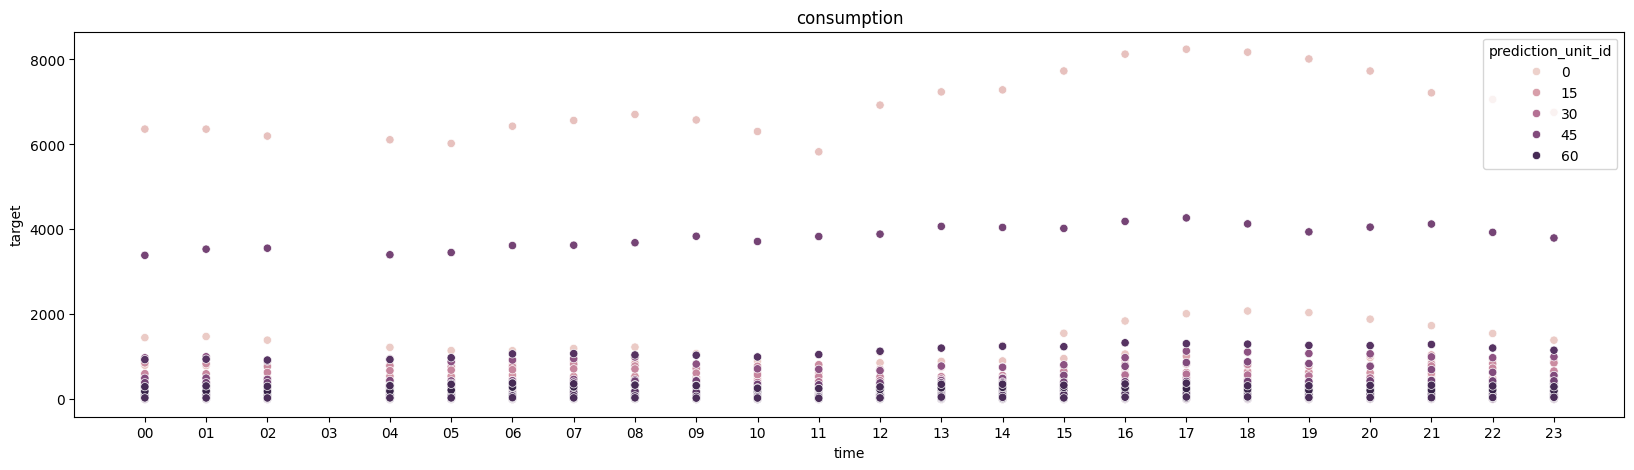

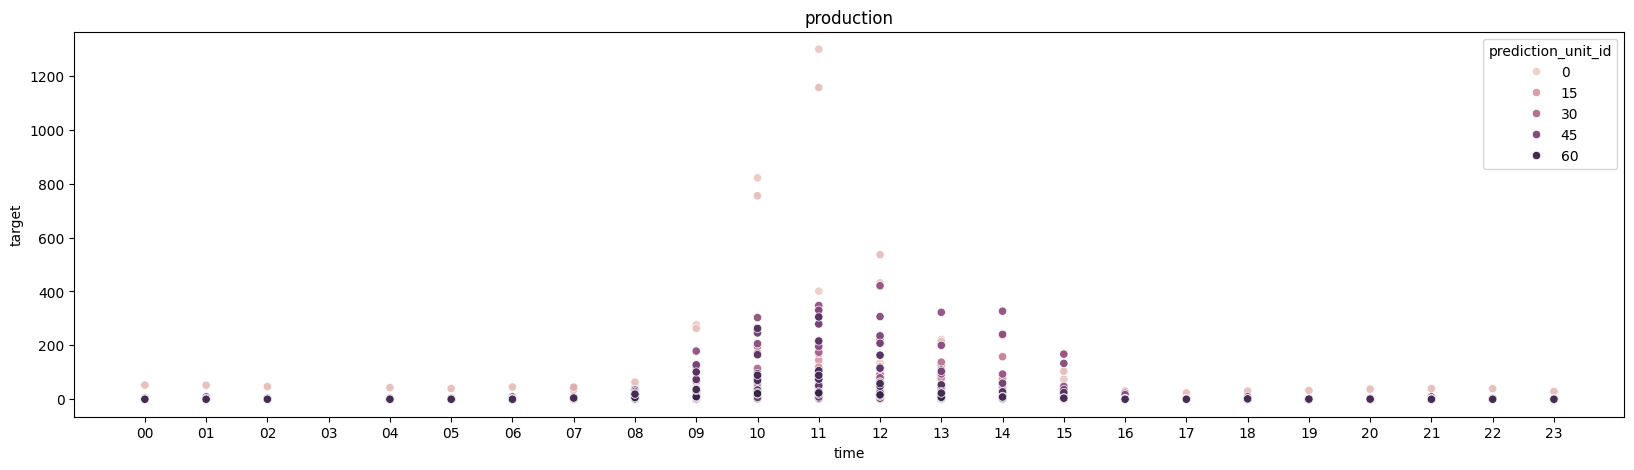

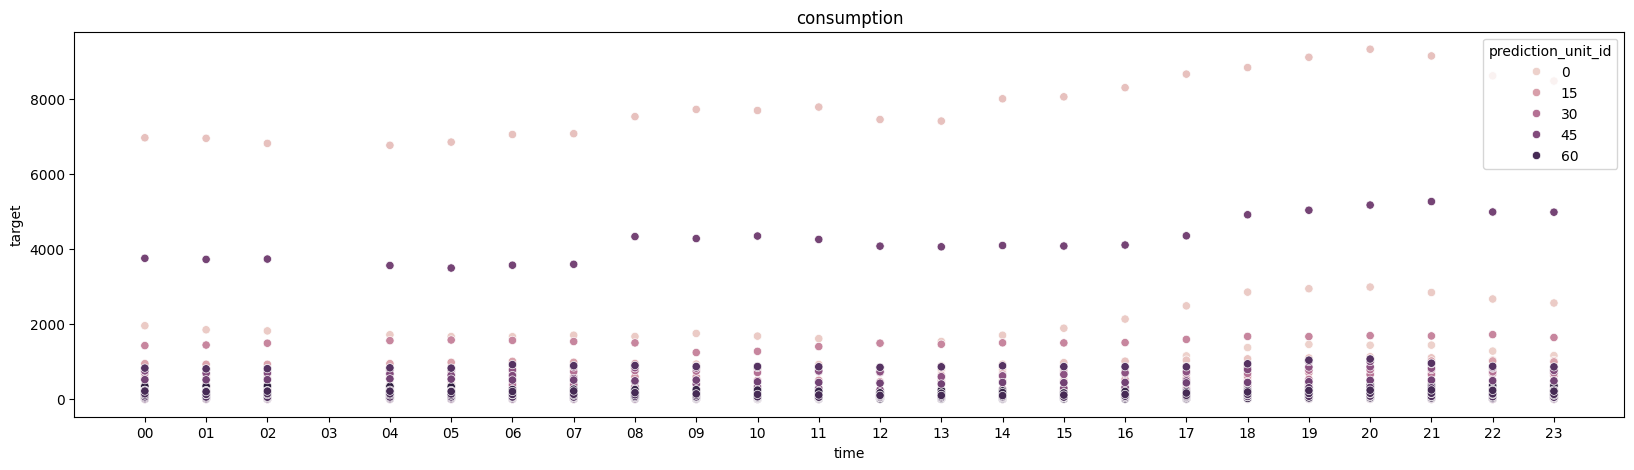

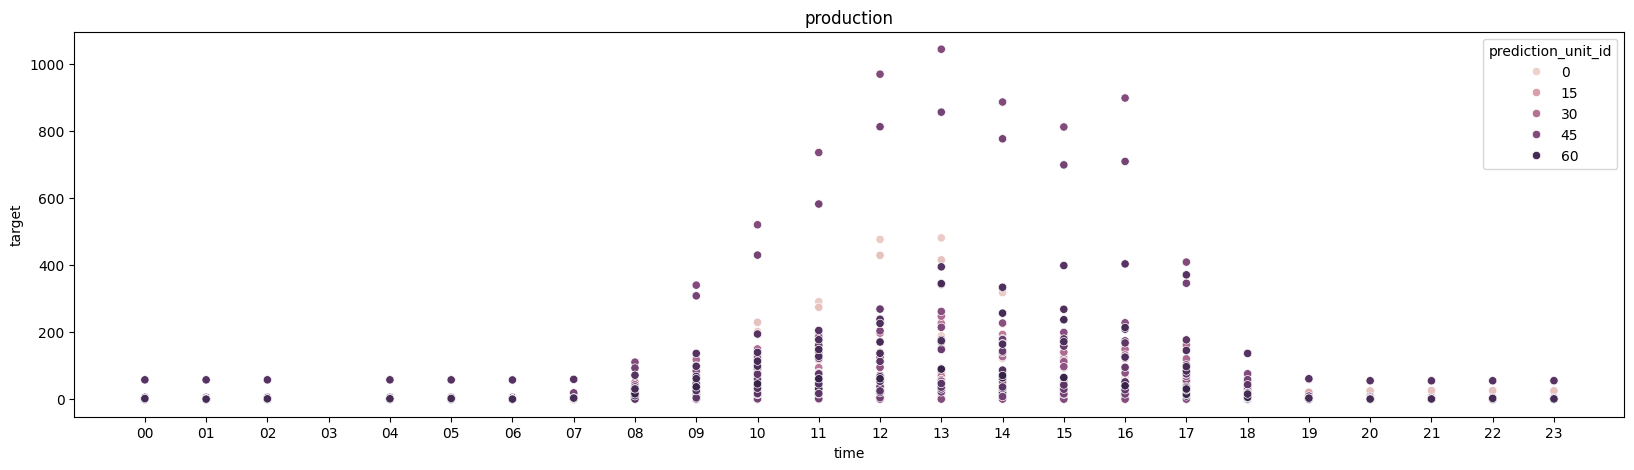

In [19]:
for dt in ['2021-10-31', '2022-03-27', '2022-10-30', '2023-03-26']:
  new_df = df[df.datetime.str.contains(dt)].copy()
  new_df['time'] = new_df.datetime.str.split().str[1].str.split(':').str[0]
  new_df_consumption = new_df[new_df.is_consumption == 1]
  new_df_prod = new_df[new_df.is_consumption == 0]
  plt.figure(figsize=(20, 5))
  plt.title('consumption')
  sns.scatterplot(new_df_consumption, x='time', y='target', hue='prediction_unit_id')
  plt.show()
  
  plt.figure(figsize=(20, 5))
  plt.title('production')
  sns.scatterplot(new_df_prod, x='time', y='target', hue='prediction_unit_id')
  plt.show()

In [20]:
df[df.datetime.str.contains('10-31 03:00:00')]

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
178938,0,0,1,NaN,0,2021-10-31 03:00:00,60,178938,0
178939,0,0,1,NaN,1,2021-10-31 03:00:00,60,178939,0
178940,0,0,2,NaN,0,2021-10-31 03:00:00,60,178940,1
178941,0,0,2,NaN,1,2021-10-31 03:00:00,60,178941,1
178942,0,0,3,NaN,0,2021-10-31 03:00:00,60,178942,2
...,...,...,...,...,...,...,...,...,...
1335851,15,1,0,211.947,1,2022-10-31 03:00:00,425,1335851,64
1335852,15,1,1,0.000,0,2022-10-31 03:00:00,425,1335852,59
1335853,15,1,1,48.327,1,2022-10-31 03:00:00,425,1335853,59
1335854,15,1,3,0.000,0,2022-10-31 03:00:00,425,1335854,60


In [29]:
16 * 2 * 4

128

In [31]:
df[['county', 'is_business', 'product_type']].drop_duplicates()

,county,is_business,product_type
0,0,0,1
2,0,0,2
4,0,0,3
6,0,1,0
8,0,1,1
...,...,...,...
272424,15,1,0
366072,2,1,1
366090,4,1,1
462864,11,1,0


In [32]:
df['prediction_unit_id'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68])

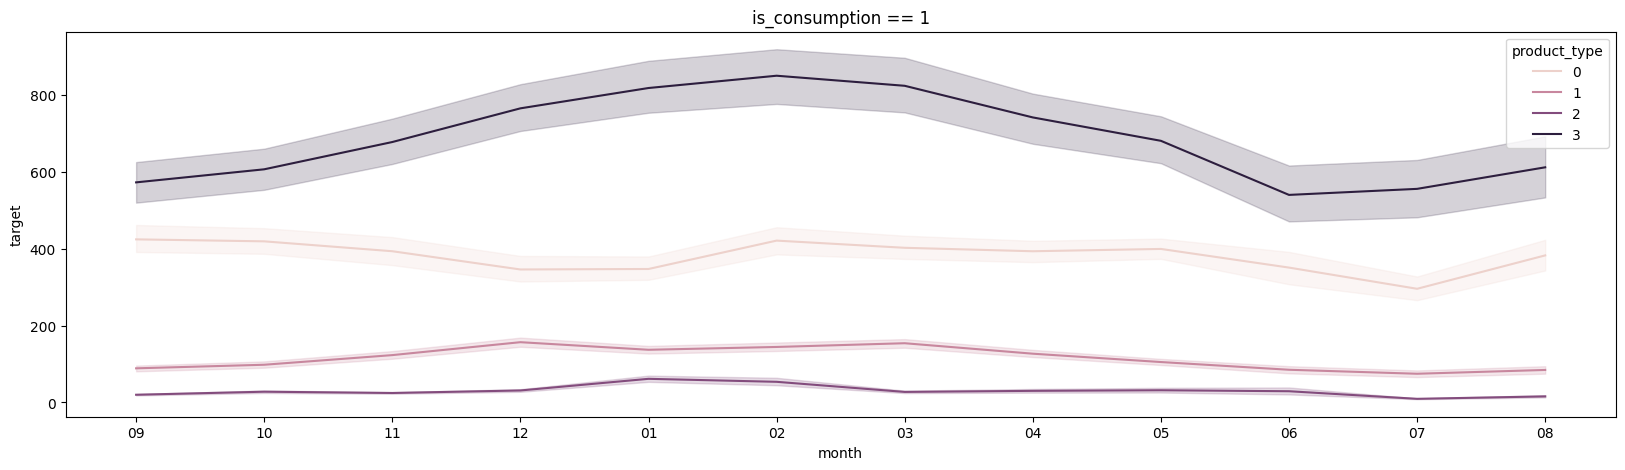

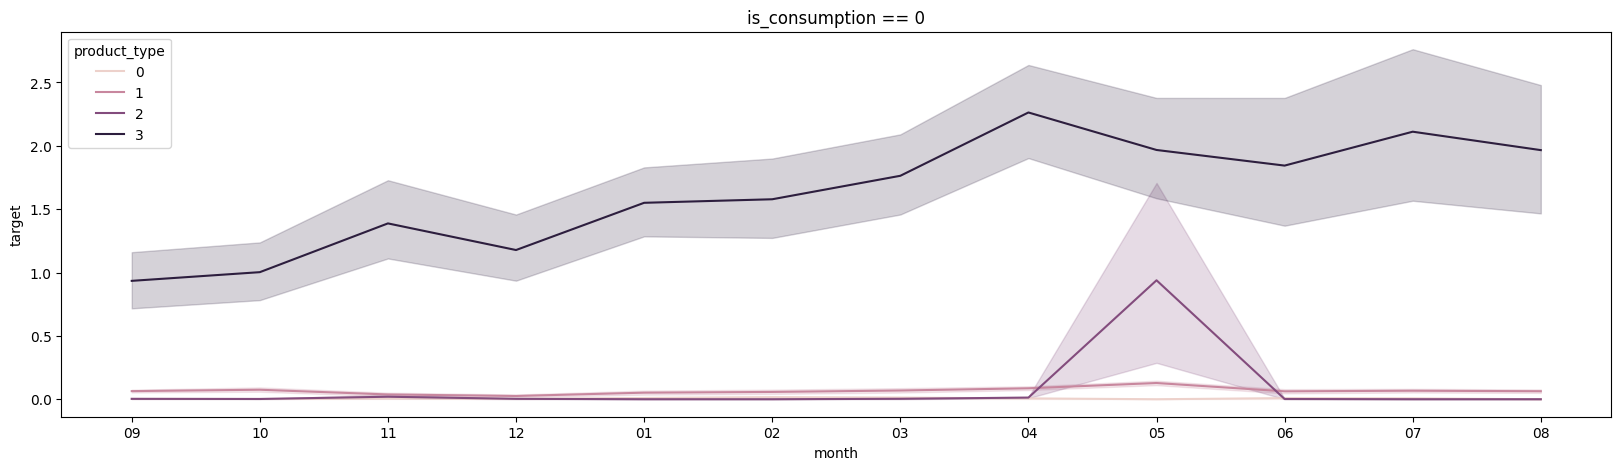

In [21]:
new_df = df[df.datetime.str.contains('03:00:00')].copy()
new_df['month'] = new_df.datetime.str.split('-').str[1]
new_df_consumption = new_df[new_df.is_consumption == 1]
new_df_prod = new_df[new_df.is_consumption == 0]

plt.figure(figsize=(20, 5))
plt.title('is_consumption == 1')
sns.lineplot(new_df_consumption, x='month', y='target', hue='product_type')
plt.show()

plt.figure(figsize=(20, 5))
plt.title('is_consumption == 0')
sns.lineplot(new_df_prod, x='month', y='target', hue='product_type')
plt.show()

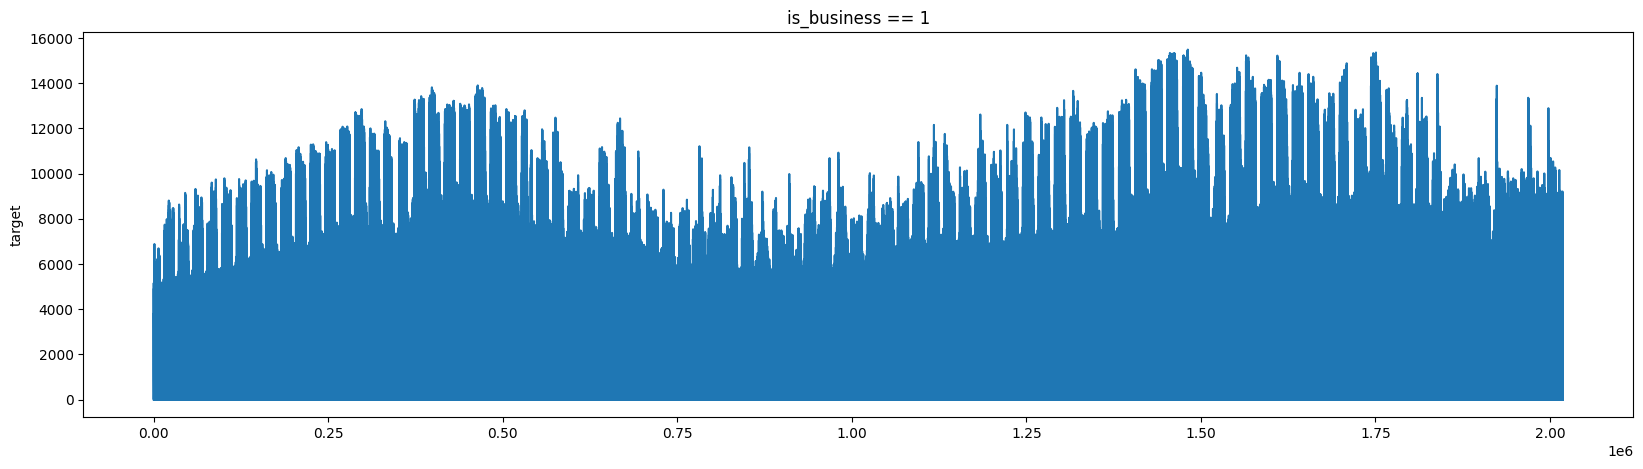

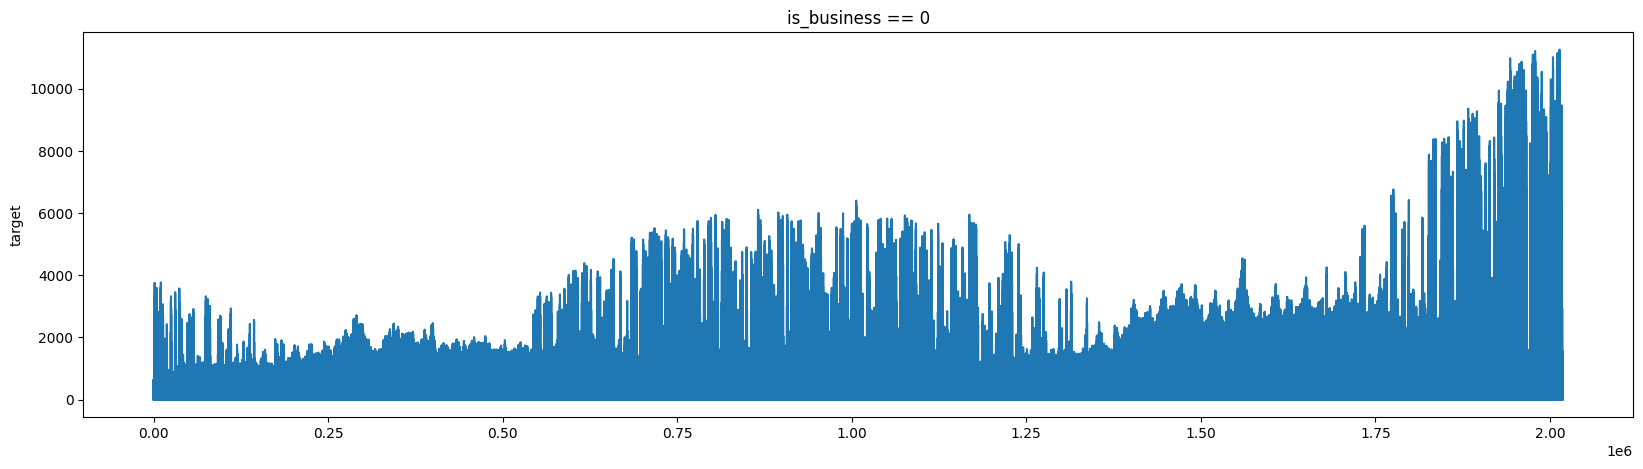

In [22]:
df_business = df[df.is_business == 1].copy()
df_house = df[df.is_business == 0].copy()

plt.figure(figsize=(20, 5))
plt.title('is_business == 1')
sns.lineplot(df_business.target)
plt.show()

plt.figure(figsize=(20, 5))
plt.title('is_business == 0')
sns.lineplot(df_house.target)
plt.show()

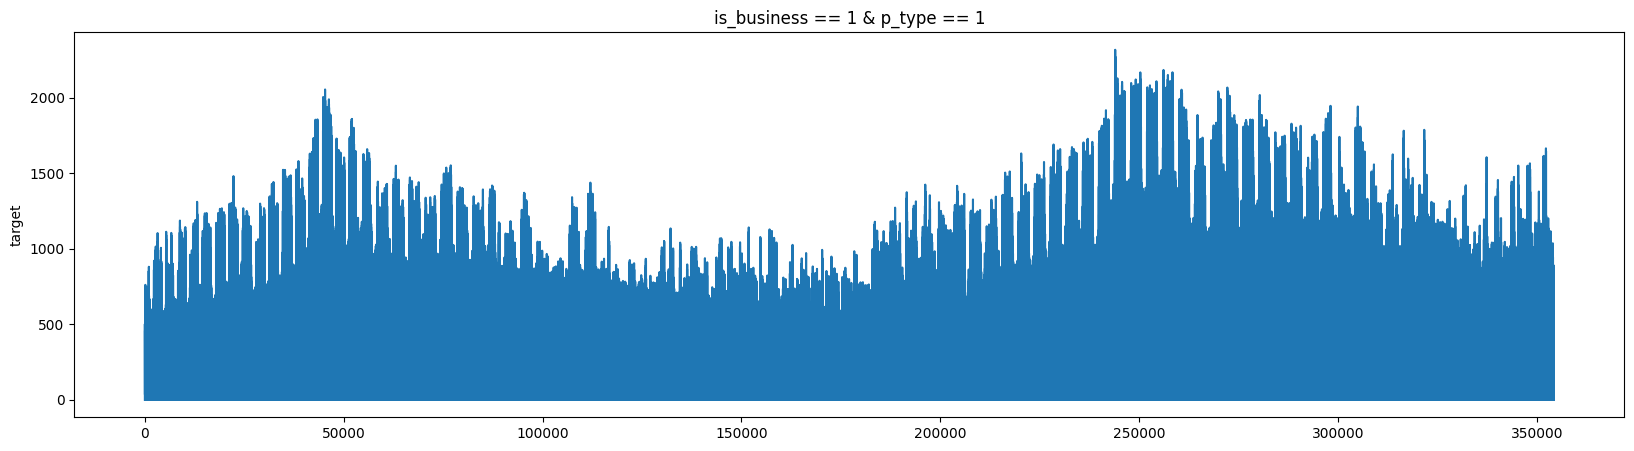

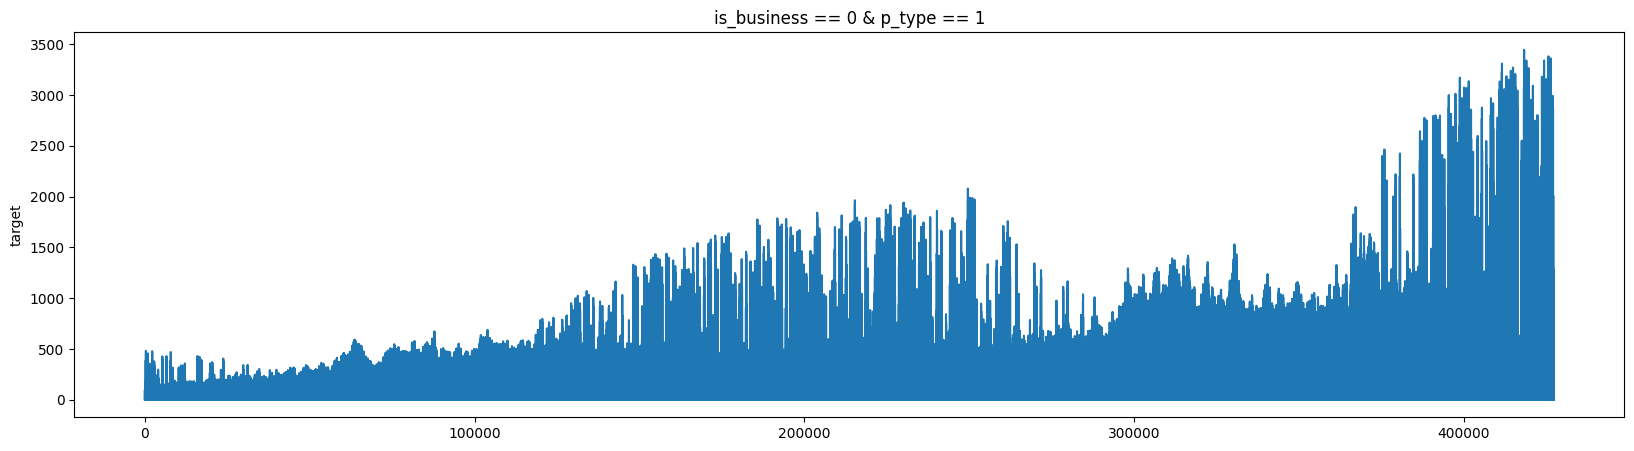

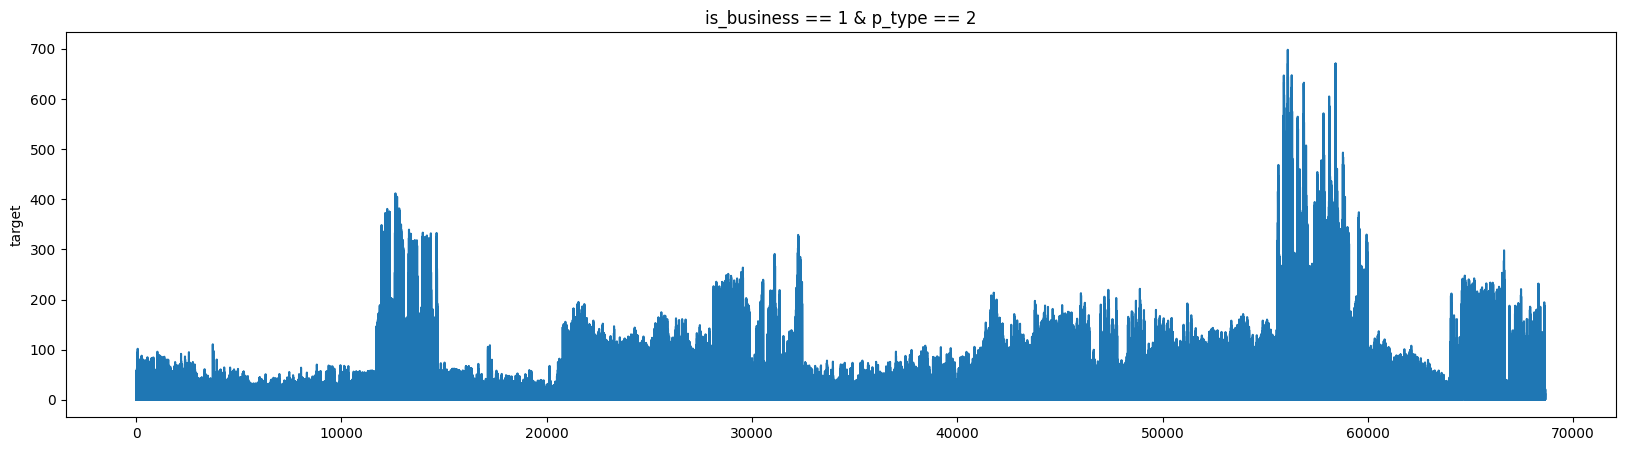

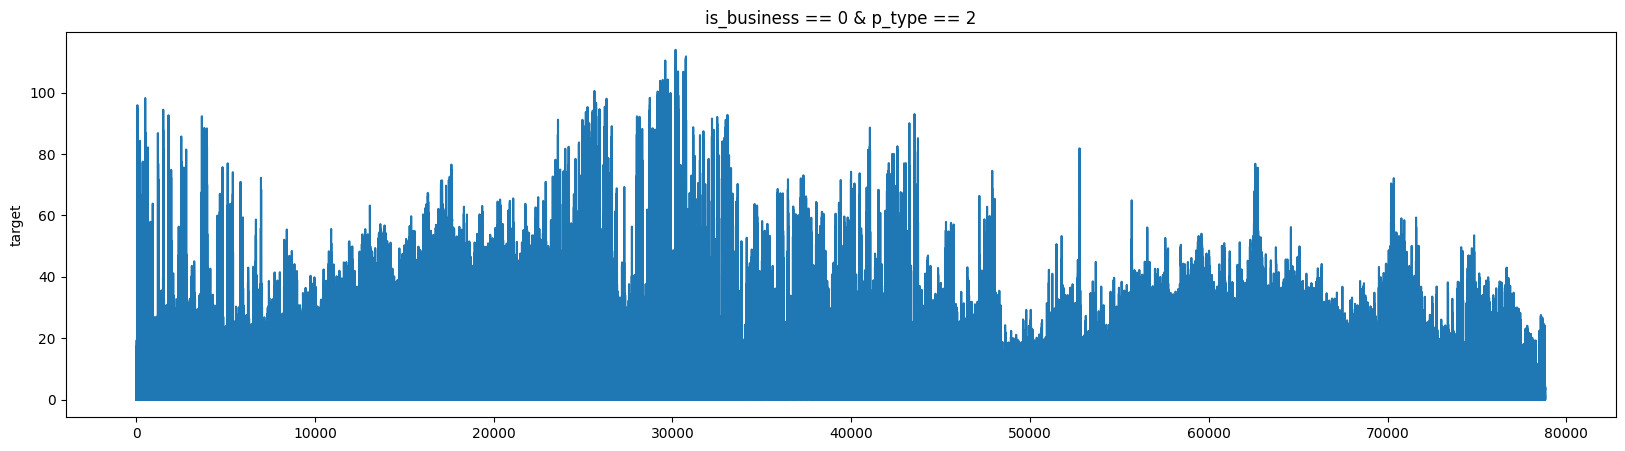

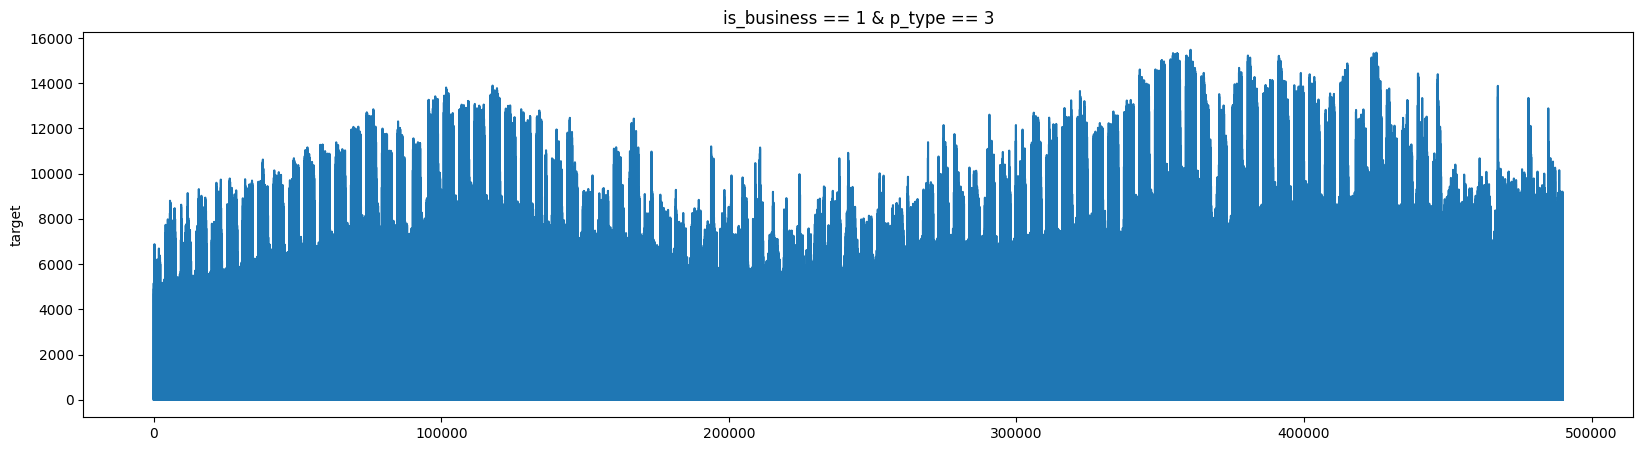

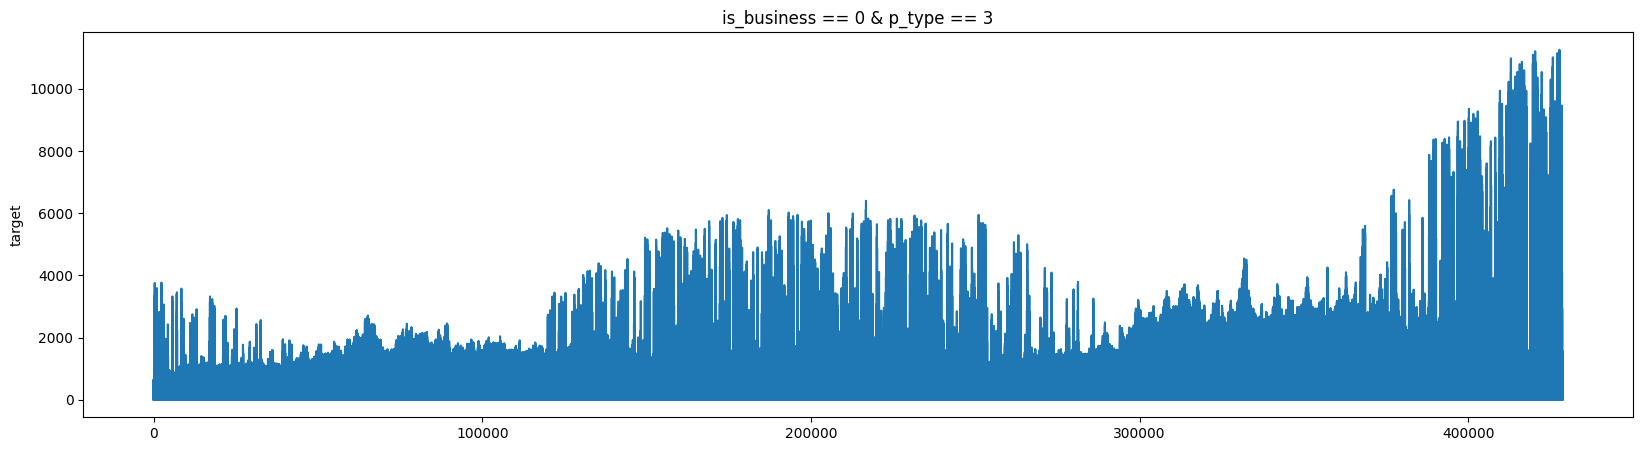

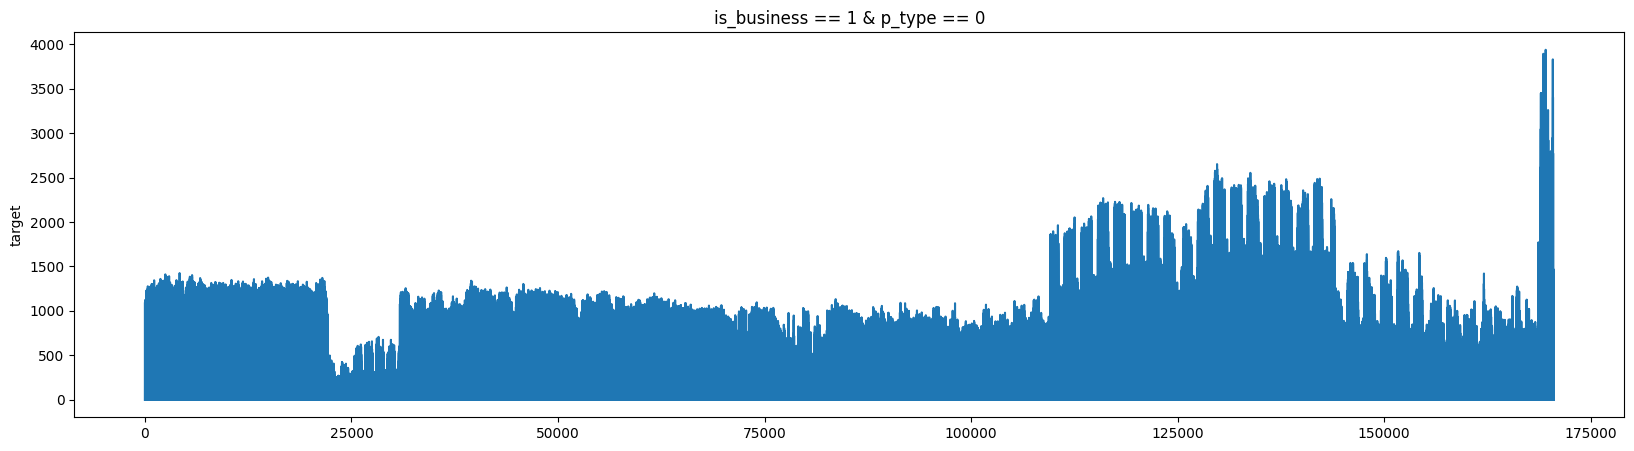

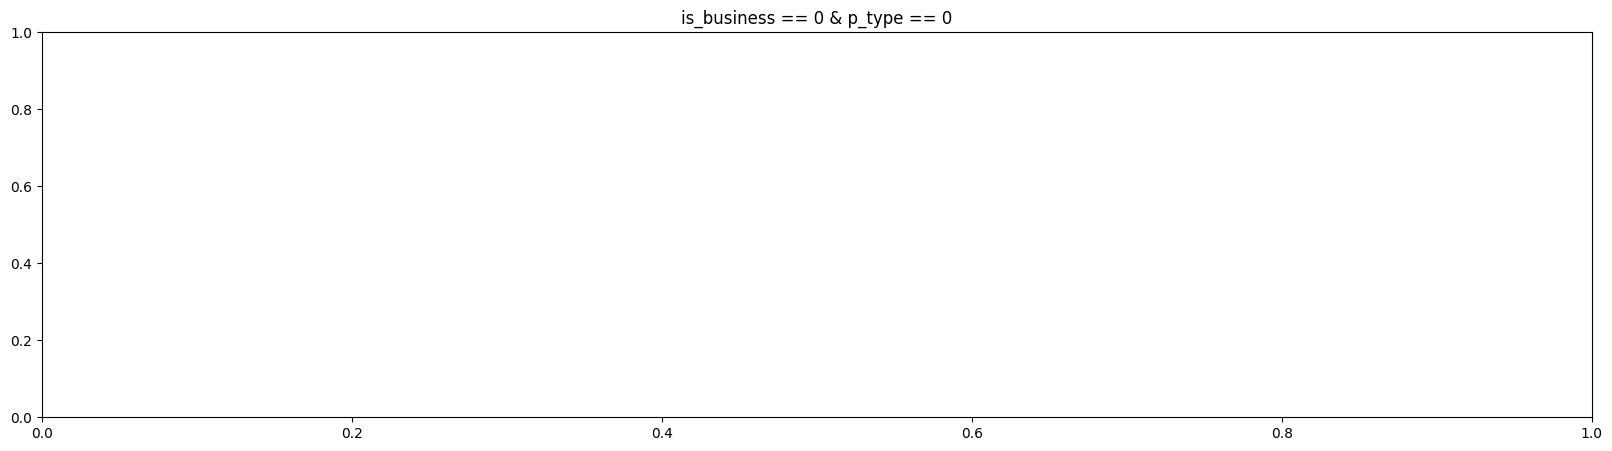

In [28]:
for p_type in df.product_type.unique():
  df_business = df[df.is_business == 1].copy()
  df_business = df_business[df_business.product_type == p_type]
  df_house = df[df.is_business == 0].copy()
  df_house = df_house[df_house.product_type == p_type]

  plt.figure(figsize=(20, 5))
  plt.title(f'is_business == 1 & p_type == {p_type}')
  sns.lineplot(x=range(len(df_business.index)), y=df_business['target'])
  plt.show()

  plt.figure(figsize=(20, 5))
  plt.title(f'is_business == 0 & p_type == {p_type}')
  sns.lineplot(x=range(len(df_house.index)), y=df_house['target'])
  plt.show()

In [1]:
import pandas as pd

In [2]:
pd.read_csv('../data/origin/train/train.csv')

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2
...,...,...,...,...,...,...,...,...,...
2018347,15,1,0,197.233,1,2023-05-31 23:00:00,637,2018347,64
2018348,15,1,1,0.000,0,2023-05-31 23:00:00,637,2018348,59
2018349,15,1,1,28.404,1,2023-05-31 23:00:00,637,2018349,59
2018350,15,1,3,0.000,0,2023-05-31 23:00:00,637,2018350,60


In [5]:
from pathlib import Path

Path('__file__').parent.parent

PosixPath('.')

In [6]:
!pwd

/home/sdk/Work/est_projects/est_wassup_02/examinations


In [5]:
import pandas as pd

df = pd.read_csv('../features/test_X.csv', index_col=['datetime'])
df.columns

Index(['prediction_unit_id', 'year', 'quarter', 'month', 'week', 'hour',
       'day_of_year', 'day_of_month', 'day_of_week', 'eic_count_client',
       'installed_capacity_client', 'temperature_h_mean', 'dewpoint_h_mean',
       'rain_h_mean', 'snowfall_h_mean', 'surface_pressure_h_mean',
       'cloudcover_total_h_mean', 'cloudcover_low_h_mean',
       'cloudcover_mid_h_mean', 'cloudcover_high_h_mean',
       'windspeed_10m_h_mean', 'winddirection_10m_h_mean',
       'shortwave_radiation_h_mean', 'direct_solar_radiation_h_mean',
       'diffuse_radiation_h_mean', 'hour_h', 'hours_ahead_f_mean',
       'temperature_f_mean', 'dewpoint_f_mean', 'cloudcover_high_f_mean',
       'cloudcover_low_f_mean', 'cloudcover_mid_f_mean',
       'cloudcover_total_f_mean', '10_metre_u_wind_component_f_mean',
       '10_metre_v_wind_component_f_mean', 'direct_solar_radiation_f_mean',
       'surface_solar_radiation_downwards_f_mean', 'snowfall_f_mean',
       'total_precipitation_f_mean', 'euros_per_m